# STEP 1 - CLIMATE ANALYSIS AND EXPLORATION
Use Python and SQLAlchemy to conduct basic climate analysis and data exploration of the climate database. All of the following analysis should be completed by using SQLAlchemy ORM queries, Pandas, and Matplotlib.

In [1]:
# Setup matplotlib libraries and graph style
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Bring in library packages
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
# Bring in SQLAlchemy library
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [4]:
# Use SQL Alchemy to create an engine and connect with sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Designate base to reflect the sqlite database into a new model 
Base = automap_base()

# Tell python to use base to reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# Look at all the classes in the sqlite file
Base.classes.keys()

['measurement', 'station']

In [7]:
# Create and save each class to a table reference. Reflect the sqlite data.
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Link Python to the database by creating an SQLAlchemy session
session = Session(bind=engine)

# Precipitation Analysis

#Find the most recent date in Measurement table data set
CSV is sorted by date oldest to most recent. The date is 8/23/2017

Text(0, 0.5, 'inches')

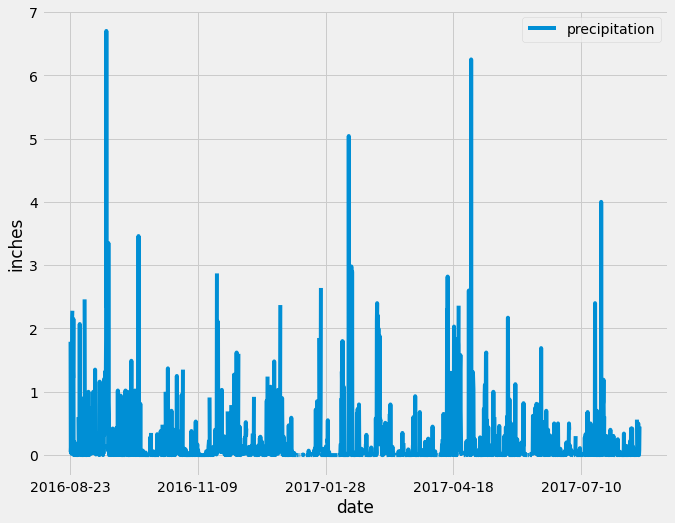

In [9]:
# Extract the last 12 months of precipitation data by querying the last 12 months of data.
# Select only 'date' and 'prcp' values
# Load query results into a Pandas DataFrame and set index to 'date'
# Sort DataFrame values by 'date'
# Plot the results using Pandas DataFrame *plot* method

last_12months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12months).all()
df = pd.DataFrame(data, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df = df.sort_index()
#df.head()

df.plot(figsize=(10,8))
plt.ylabel("inches")

In [10]:
# Use Pandas to print the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [11]:
#Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()


[(9)]

In [12]:
# Query to find the most active stations (i.e., which stations have the most rows?)
# List the stations and counts in descending order
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station)\
    .desc()).all()

# Which station id had the highest number of observations? Ans: USC00519281

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Select the most active station id and calculate the lowest, highest, and average temperature
session.query(func.min(Measurement.tobs),\
              func.max(Measurement.tobs),\
              func.avg(Measurement.tobs))\
            .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

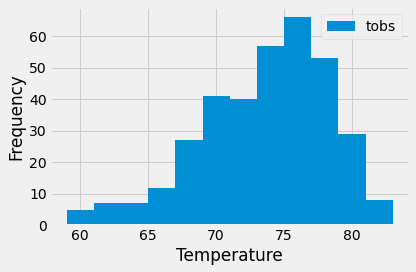

In [14]:
# Filter the most active station id's last 12 months of tobs (temperature observation) data
# Plot the results as a histogram with bins=12

import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
    .filter(Measurement.date >= prev_year).all()
df2 = pd.DataFrame(data, columns=['tobs'])
df2.plot(kind="hist", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()

In [15]:
session.close()